In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
from fastai.vision import *
train_data_csv_path = './train_val_no_path.csv'
test_data_csv_path = './test_no_path.csv'

In [2]:
import torch 
print(torch.cuda.current_device())
torch.rand(1).cuda()

0


tensor([0.7230], device='cuda:0')

In [3]:
train_df = pd.read_csv(train_data_csv_path)
test_df = pd.read_csv(test_data_csv_path)

In [4]:
train_df.head()

,Unnamed: 0,name,label
0,0,C228ThinF_IMG_20151112_142452_cell_85.png,0.0
1,1,C184P145ThinF_IMG_20151203_102721_cell_1.png,1.0
2,2,C81P42ThinF_IMG_20150817_121113_cell_180.png,1.0
3,3,C171P132ThinF_IMG_20151119_153425_cell_219.png,0.0
4,4,C84P45ThinF_IMG_20150818_101226_cell_45.png,0.0


In [5]:
test_df.head()

,Unnamed: 0,name,label
0,0,C189P150ThinF_IMG_20151203_141308_cell_73.png,1.0
1,1,C132P93ThinF_IMG_20151004_151941_cell_39.png,1.0
2,2,C203ThinF_IMG_20151029_105443_cell_288.png,0.0
3,3,C68P29N_ThinF_IMG_20150819_133236_cell_171.png,1.0
4,4,C141P102ThinF_IMG_20151005_214836_cell_149.png,1.0


In [6]:
train_df = train_df.loc[:, ~train_df.columns.str.contains('^Unnamed')]
test_df = test_df.loc[:, ~test_df.columns.str.contains('^Unnamed')]

In [7]:
train_df.head()

,name,label
0,C228ThinF_IMG_20151112_142452_cell_85.png,0.0
1,C184P145ThinF_IMG_20151203_102721_cell_1.png,1.0
2,C81P42ThinF_IMG_20150817_121113_cell_180.png,1.0
3,C171P132ThinF_IMG_20151119_153425_cell_219.png,0.0
4,C84P45ThinF_IMG_20150818_101226_cell_45.png,0.0


In [8]:
test_df.head()

,name,label
0,C189P150ThinF_IMG_20151203_141308_cell_73.png,1.0
1,C132P93ThinF_IMG_20151004_151941_cell_39.png,1.0
2,C203ThinF_IMG_20151029_105443_cell_288.png,0.0
3,C68P29N_ThinF_IMG_20150819_133236_cell_171.png,1.0
4,C141P102ThinF_IMG_20151005_214836_cell_149.png,1.0


In [9]:
train_df['label'] = train_df['label'].astype(np.int32)
train_df.head()

,name,label
0,C228ThinF_IMG_20151112_142452_cell_85.png,0
1,C184P145ThinF_IMG_20151203_102721_cell_1.png,1
2,C81P42ThinF_IMG_20150817_121113_cell_180.png,1
3,C171P132ThinF_IMG_20151119_153425_cell_219.png,0
4,C84P45ThinF_IMG_20150818_101226_cell_45.png,0


In [10]:
path = './cell_images'

# Loading Data

In [11]:
data = ImageDataBunch.from_df(path, train_df, ds_tfms=get_transforms(flip_vert=True, max_warp=0), size=60, valid_pct=0.2,bs = 64).normalize(imagenet_stats)

# Showing random data batch

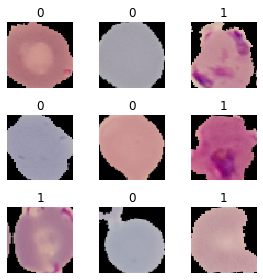

In [12]:
data.show_batch(rows=3, figsize=(4,4))

# Making a  deep residuial convolutional neural network with 50 layers

In [17]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy).load('trained_model')

# Using the fit once method I find the network learning rate

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


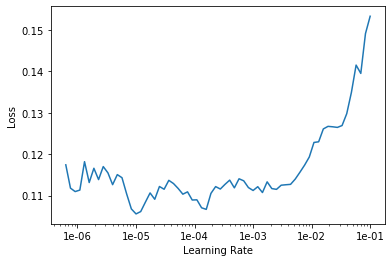

In [18]:
learn.lr_find()
learn.recorder.plot()

In [54]:
learn.show_results()

# Training 10 epochs 

In [55]:
learn.fit_one_cycle(10,slice(1e-3,1e-2))

In [56]:
learn.save("trained_model", return_path=True)

In [57]:
learn.unfreeze()

# Finding the learning rate to train 2 more epochs

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


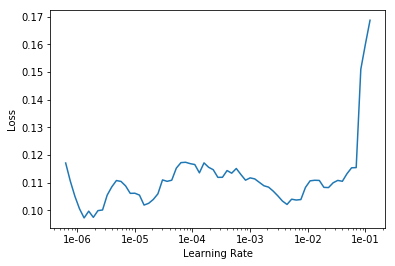

In [58]:
learn.lr_find()
learn.recorder.plot()

# Showing some results from previous training on the validation set 

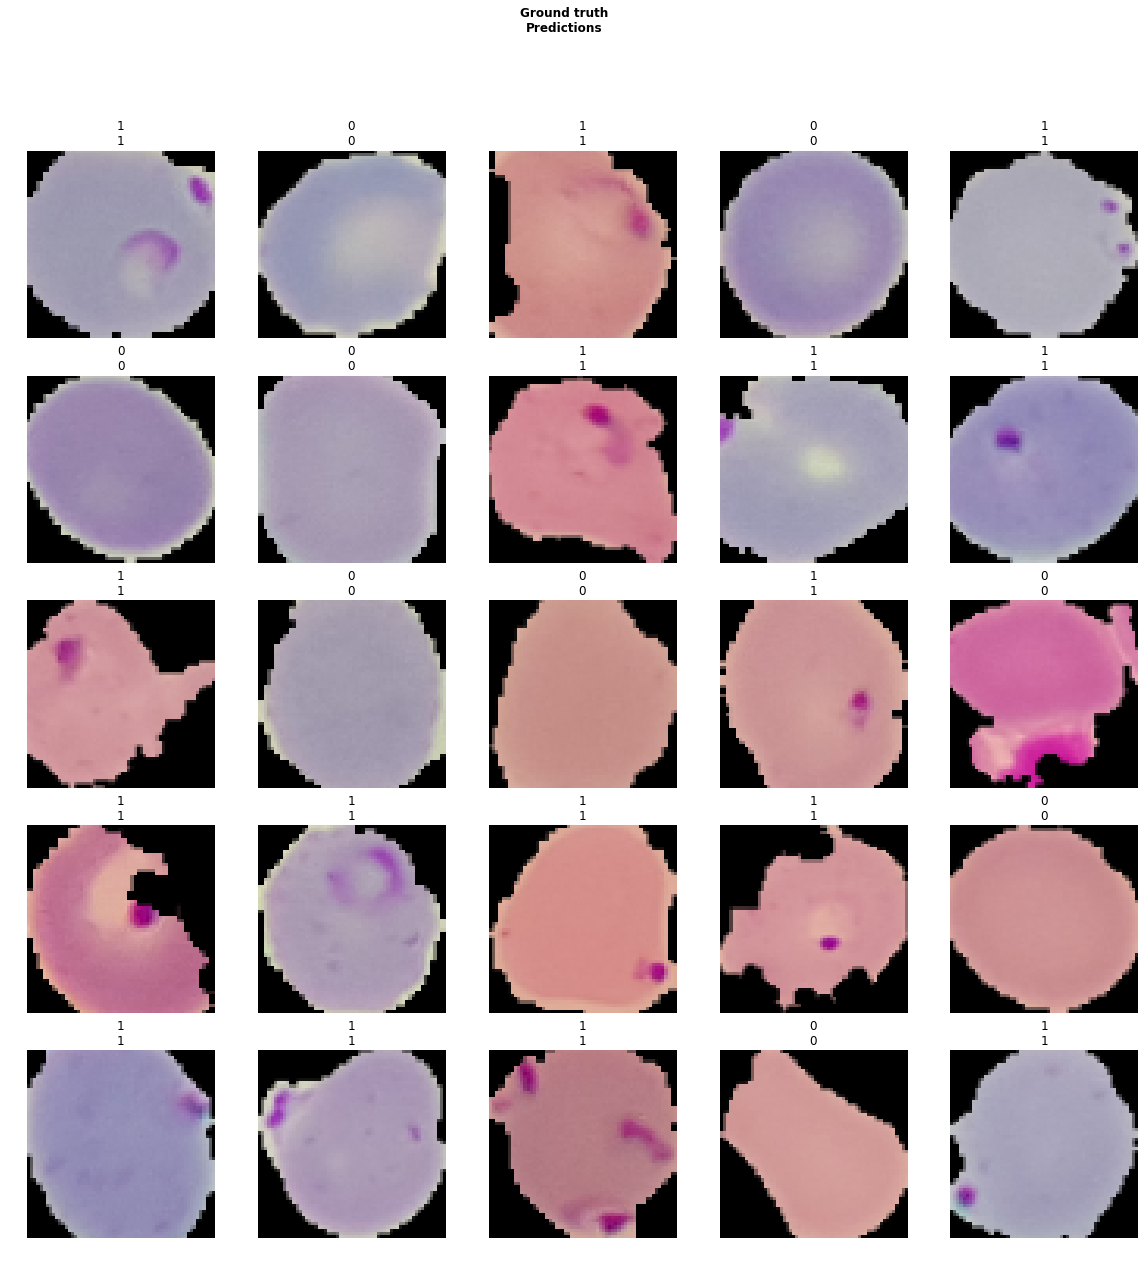

In [59]:
learn.show_results()

# Training two more Epochs 

In [60]:
learn.fit_one_cycle(10,1e-7)

epoch,train_loss,valid_loss,accuracy,time
0,0.117151,0.095904,0.964919,04:03
1,0.119008,0.095569,0.962702,01:54


# Loading test dataset 

In [33]:
test_df['label'] = test_df['label'].astype('int64')

In [34]:
test_df.head()

,name,label
0,C189P150ThinF_IMG_20151203_141308_cell_73.png,1
1,C132P93ThinF_IMG_20151004_151941_cell_39.png,1
2,C203ThinF_IMG_20151029_105443_cell_288.png,0
3,C68P29N_ThinF_IMG_20150819_133236_cell_171.png,1
4,C141P102ThinF_IMG_20151005_214836_cell_149.png,1


In [35]:
test_data = ImageDataBunch.from_df(path, test_df, ds_tfms=get_transforms(flip_vert=True, max_warp=0), size=60, valid_pct=0).normalize(imagenet_stats)

# Getting predictions 

In [36]:
prob,real = learn.get_preds(test_data.train_dl)

In [37]:
prob.shape

torch.Size([19843, 2])

In [38]:
real.shape

torch.Size([19843])

# Getting Accuracy Score

In [39]:
preds = prob
ys = real
accuracy(preds, ys)

tensor(0.9634)

# Accuracy is 0.9634

In [40]:
preds

tensor([[0.9983, 0.0017],
        [0.0118, 0.9882],
        [0.9874, 0.0126],
        ...,
        [0.9976, 0.0024],
        [0.0032, 0.9968],
        [0.9806, 0.0194]])

In [41]:
test_preds,index = preds.max(dim=1)

In [42]:
test_preds,index

(tensor([0.9983, 0.9882, 0.9874,  ..., 0.9976, 0.9968, 0.9806]),
 tensor([0, 1, 0,  ..., 0, 1, 0]))

In [43]:
test_preds.shape,ys.shape

(torch.Size([19843]), torch.Size([19843]))

# Getting F1 Score

In [45]:
from sklearn.metrics import f1_score
f1_score(index.numpy(),ys.numpy())

0.9627923639899687

#  The F1 Score is 0.9627923639899687
We have similar f1 score and accuracy score beacause the test set has the same ammount of possitive and negative samples

In [46]:
learn.save("trained_model2", return_path=True)

WindowsPath('cell_images/models/trained_model2.pth')